## Plots of the results for the Eukaryote datasets

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import statistics as s

#### Concatenate all Eukaryote results files.
Euk_balt_results.csv  
Euk_all_results.csv    Euk_RNA_results.csv

In [2]:
results_files = ['Euk_balt_results.csv','Euk_all_results.csv',    'Euk_RNA_results.csv']
dfs = [] 
for filename in results_files:
    df1 = pd.read_csv(f'../results/{filename}') 
    dfs.append(df1)
df = pd.concat(dfs)

In [3]:
df.rename(columns = {'label tax group':'tax', 'positive label':'label' }, inplace=True)
df.drop(columns= [ 'pool label', 'pool tax group'], inplace =True)

con = lambda row :f'{row["label"]}_{row["Baltimore"]}' 
df['Dataset'] = df.apply ( con, axis =1)
fs = lambda row: f'{row["Features"]}_{row["k"]}'
df['Feature set'] = df.apply(fs,axis = 1)

tax_order =['kingdom','phylum','class','order','family','genus','species']
df['tax'] = df['tax'].astype('category')
df['tax'].cat.set_categories(tax_order, inplace=True)
fs_order =['DNA_1','DNA_2','DNA_3','DNA_4','DNA_5','DNA_6','DNA_7','DNA_8','DNA_9','AA_1','AA_2','AA_3','AA_4','PC_1','PC_2','PC_3','PC_4','PC_5','PC_6','Domains_0']
df['Feature set'] = df['Feature set'].astype('category')
df['Feature set'].cat.set_categories(fs_order, inplace=True)
balt_order = ['all','RNA' ,'(+)ssRNA', '(-)ssRNA',  'dsRNA', 'dsDNA','ssDNA']
df['Baltimore'] = df['Baltimore'].astype('category')
df['Baltimore'].cat.set_categories(balt_order, inplace=True)
           

In [4]:
df.head()

,label,tax,Baltimore,N in class,Features,k,AUC,Dataset,Feature set
0,Metazoa,kingdom,dsDNA,250,DNA,1,0.650,Metazoa_dsDNA,DNA_1
1,Metazoa,kingdom,dsDNA,250,DNA,2,0.802,Metazoa_dsDNA,DNA_2
2,Metazoa,kingdom,dsDNA,250,DNA,3,0.978,Metazoa_dsDNA,DNA_3
3,Metazoa,kingdom,dsDNA,250,DNA,4,0.999,Metazoa_dsDNA,DNA_4
4,Metazoa,kingdom,dsDNA,250,DNA,5,1.000,Metazoa_dsDNA,DNA_5


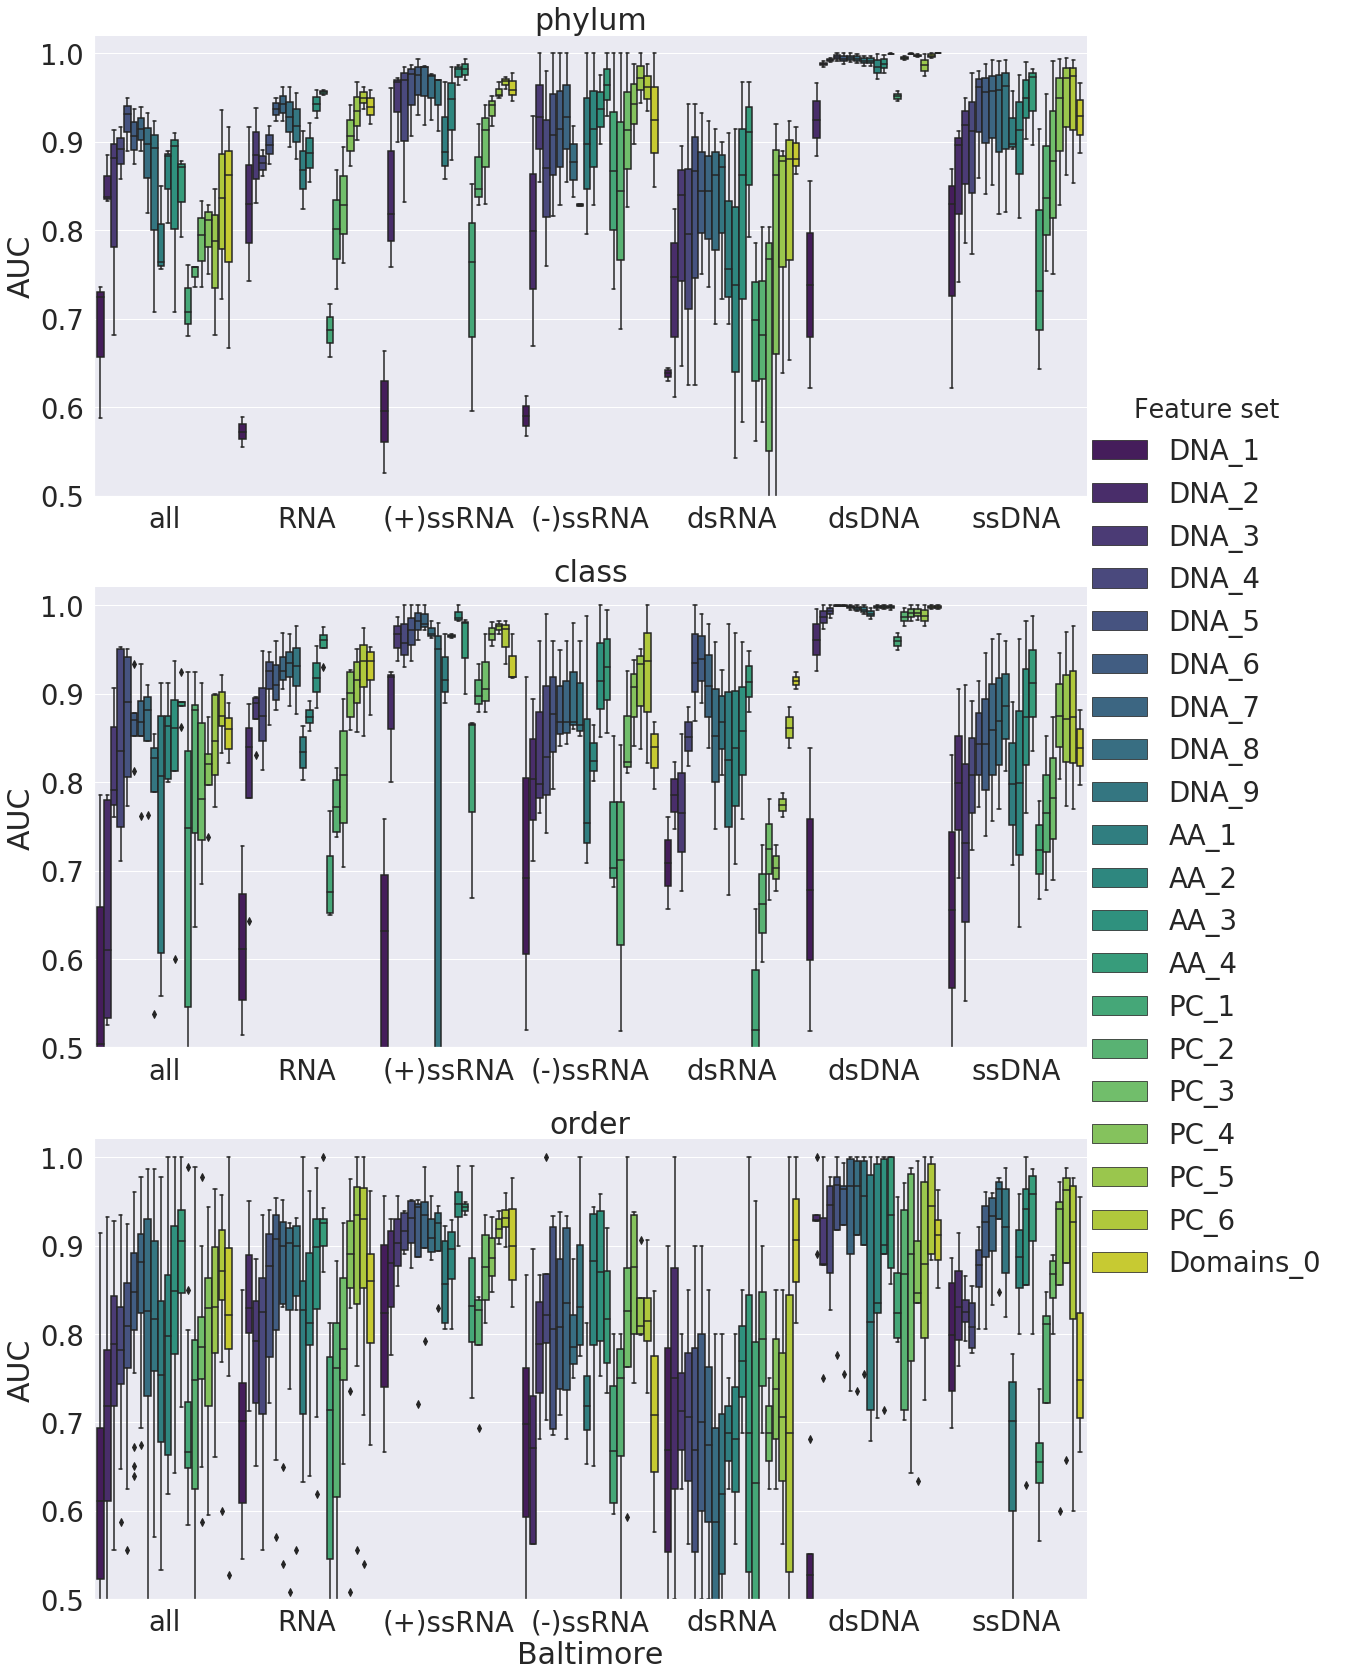

In [5]:
tax_ss = ['phylum','class','order']
subset = df[(df['tax'].isin(tax_ss))]


sns.set(font_scale=2.5 )
g = sns.catplot(data=subset , col= "tax",col_wrap=1, height=8,aspect =2, 
                  margin_titles=True, col_order=tax_ss, legend_out = True,
                    x = 'Baltimore',y = 'AUC', hue = 'Feature set',
                    kind = 'box',
                    hue_order = fs_order,
                    palette='viridis',
                    order= balt_order,
                    dodge = True,
                    sharex = False,
                     width =.95 ,linewidth =1.5)
                  
g.set_titles('{col_name}' ,fontsize= 80)
g.set(ylim = (0.5,1.02) ) 
plt.subplots_adjust(hspace = 0.2)

## Heat Map

In [6]:
concat_ds = lambda row: f'{row["tax"][0]}_{row["Dataset"]} '
df['ds']= df.apply(concat_ds , axis=1)

df1 = df.sort_values(['tax','label'])
unique = []
# [unique.append(ds) for ds in list(df1['Dataset']) if ds not in unique ]
for d in (list(df1['ds'])):
    if d not in unique:
        unique.append(d)

dfp = df1.pivot_table(index='ds',columns='Feature set', values ='AUC').reindex(unique)


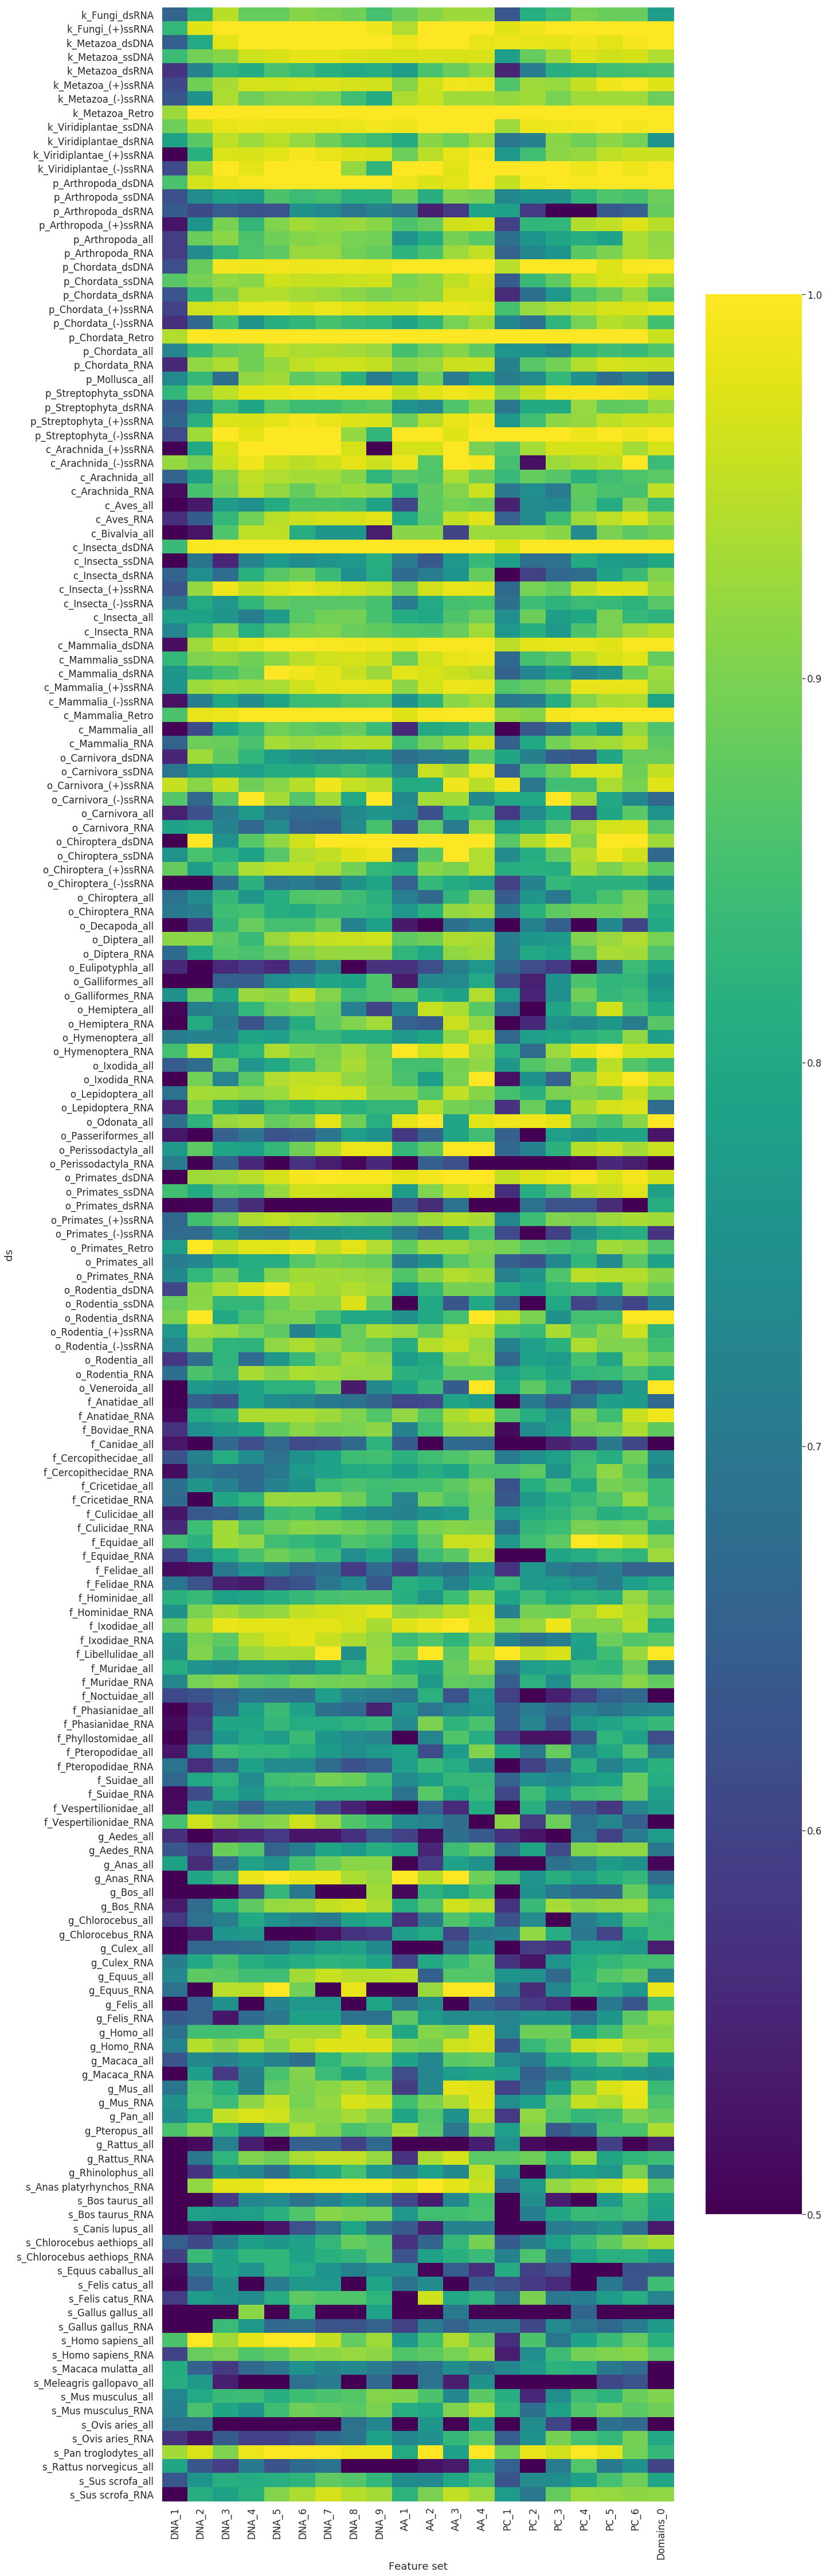

In [7]:
sns.set(font_scale=1.5)
f, ax = plt.subplots(figsize=(20, 80))
sns.heatmap(dfp,cmap = 'viridis', vmin = 0.5,   ax=ax)